In [87]:
# EDA e Visualizacao de Dados
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimizacao
import optuna

### Carregar os Dados

In [88]:
# Carregar Data Frame
df_laptops = pd.read_csv('datasets/laptops_new.csv')

In [89]:
# Analisar a Estrutura
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [90]:
# Visualizar primeiros registros
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


In [91]:
# Visualizar os ultimos registros
df_laptops.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,SSD,1024,nvidia,dedicated,False,15.6,1920,1080,windows,2
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,14.0,2880,1800,windows,1
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,16.0,1920,1200,windows,1
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


### EDA

In [92]:
# Estatística das variáveis
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [93]:
# Checar variavel year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [94]:
# Ajustasr variavel year_of_warranty
# converter No information para 0 e outros valores para inteiros
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)


In [95]:
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height,year_of_warranty
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043,1.083754
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019,0.311478
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000,1.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,1.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000,3.000000


In [96]:
# transforma variiável booleana em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [97]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [98]:
# Distribuição da variável brand
percentual_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentual_brand, color=percentual_brand.index,)

In [99]:
# Distribuição da variável processor_brand
percentual_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index,)

<Axes: xlabel='price', ylabel='Count'>

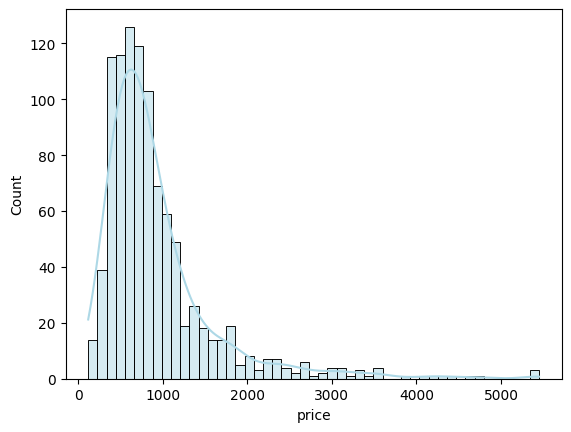

In [100]:
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

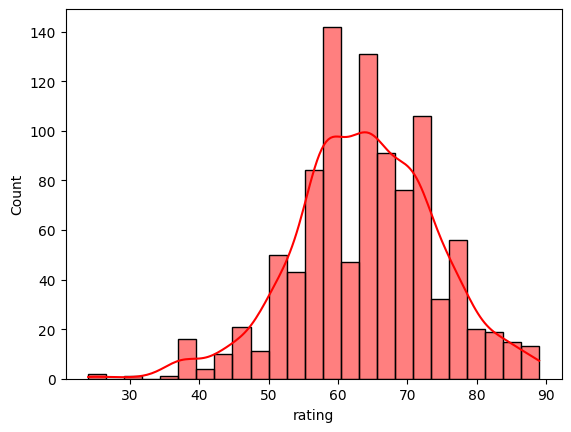

In [101]:
# Distribuição da variável rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [102]:
# Plot de distribuição (Box Plot) por Brand e Price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [103]:
# Plot de distribuição (Box Plot) por Brand e rating
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [104]:
# Scarterplot de Price e Rating
px.scatter(df_laptops, x='price', y='rating', color='brand', hover_data=['brand'])

### Treinar modelo de clustering hierarquico

In [105]:
# Selecionar as colunas para clusterização
X = df_laptops.copy()

# remover colunas desnecessárias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [106]:
X

,brand,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,tecno,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,tecno,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,hp,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,acer,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,lenovo,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,asus,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,1
987,msi,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,2
988,asus,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
989,asus,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,0,14.0,2560,1600,windows,1


In [107]:
# Separando variáveis numéricas e categóricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'primary_storage_type', 'gpu_brand', 'gpu_type', 'os']

In [108]:
# Aplicar as transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [109]:
# Criar pre processador de transformacoes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
)

In [110]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)
X_transformed

<991x56 sparse matrix of type '<class 'numpy.float64'>'
	with 14865 stored elements in Compressed Sparse Row format>

In [111]:
def hierarchical_aglomerative_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Criétido de distnacia entre dois conjuntos para formar os clusters
    # Ward = Variancia
    # Average = Distancia media
    # Complete = Distancia maxima
    # Single = Distancia minima
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

    # Instanciar o modelo
    hierquical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

    # Ajustando o modelo com fit predict
    y_predict = hierquical_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette score
    silhouette_avg = silhouette_score(X_transformed, y_predict)

    return silhouette_avg

In [112]:
# Criando um estudo no Optuna

search_space_ag = {"n_clusters": range(10, 151), "linkage": ['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space_ag)
study_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2025-06-19 15:23:31,520] A new study created in memory with name: no-name-8da243bc-507c-4d4d-953a-120d617c9b6b


In [113]:
# Executar estudo do Optuna Aglomerativo
study_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2025-06-19 15:23:31,597] Trial 0 finished with value: 0.2117381929125553 and parameters: {'n_clusters': 93, 'linkage': 'complete'}. Best is trial 0 with value: 0.2117381929125553.
[I 2025-06-19 15:23:31,666] Trial 1 finished with value: -0.005042313385929641 and parameters: {'n_clusters': 99, 'linkage': 'single'}. Best is trial 0 with value: 0.2117381929125553.
[I 2025-06-19 15:23:31,733] Trial 2 finished with value: 0.19771855039257416 and parameters: {'n_clusters': 75, 'linkage': 'complete'}. Best is trial 0 with value: 0.2117381929125553.
[I 2025-06-19 15:23:31,796] Trial 3 finished with value: 0.28056302508341896 and parameters: {'n_clusters': 113, 'linkage': 'ward'}. Best is trial 3 with value: 0.28056302508341896.
[I 2025-06-19 15:23:31,860] Trial 4 finished with value: 0.1570993023078741 and parameters: {'n_clusters': 22, 'linkage': 'single'}. Best is trial 3 with value: 0.28056302508341896.
[I 2025-06-19 15:23:31,926] Trial 5 finished with value: 0.20351014985722754 and para

In [114]:
# Mostrar melhor configuração do Optuna (Aglomerative)
best_params_ag = study_ag.best_params
best_value_ag = study_ag.best_value
print(f"Clusters = {best_params_ag['n_clusters']}")
print(f"Linkage = {best_params_ag['linkage']}")
print(f"Melhor valor (Aglomerativo): {best_value_ag}")

Clusters = 150
Linkage = ward
Melhor valor (Aglomerativo): 0.3259237468970409


In [115]:
def hierarchical_divisive_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)

    # Instanciar o modelo
    divisive_model = BisectingKMeans(n_clusters=n_clusters)

    # Ajustando o modelo com fit predict
    y_predict = divisive_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette score
    silhouette_avg = silhouette_score(X_transformed, y_predict)

    return silhouette_avg

In [116]:
# Criando um estudo no Optuna

search_space_div = {"n_clusters": range(10, 151)}
sampler_div = optuna.samplers.GridSampler(search_space_div)
study_div = optuna.create_study(direction='maximize', sampler=sampler_div)

[I 2025-06-19 15:24:56,656] A new study created in memory with name: no-name-0ce388ea-66f2-4e57-af62-be9c119209b7


In [117]:
# Executar estudo do Optuna Aglomerativo
study_div.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2025-06-19 15:24:56,733] Trial 0 finished with value: 0.14688533321427874 and parameters: {'n_clusters': 25}. Best is trial 0 with value: 0.14688533321427874.


[I 2025-06-19 15:24:56,847] Trial 1 finished with value: 0.17279877011952538 and parameters: {'n_clusters': 75}. Best is trial 1 with value: 0.17279877011952538.
[I 2025-06-19 15:24:57,002] Trial 2 finished with value: 0.17815188641170512 and parameters: {'n_clusters': 121}. Best is trial 2 with value: 0.17815188641170512.
[I 2025-06-19 15:24:57,105] Trial 3 finished with value: 0.15828000644793497 and parameters: {'n_clusters': 63}. Best is trial 2 with value: 0.17815188641170512.
[I 2025-06-19 15:24:57,171] Trial 4 finished with value: 0.15365485787683505 and parameters: {'n_clusters': 11}. Best is trial 2 with value: 0.17815188641170512.
[I 2025-06-19 15:24:57,297] Trial 5 finished with value: 0.18390437434863136 and parameters: {'n_clusters': 141}. Best is trial 5 with value: 0.18390437434863136.
[I 2025-06-19 15:24:57,403] Trial 6 finished with value: 0.16386922856145156 and parameters: {'n_clusters': 102}. Best is trial 5 with value: 0.18390437434863136.
[I 2025-06-19 15:24:57,52

In [118]:
# Mostrar melhor configuração do Optuna (Divisive)
best_params_div = study_div.best_params
best_value_div = study_div.best_value
print(f"Clusters = {best_params_div['n_clusters']}")
print(f"Melhor valor (Aglomerativo): {best_value_div}")

Clusters = 150
Melhor valor (Aglomerativo): 0.221317048977748


In [119]:
# Criar o Modelo com melhor configuração (Aglomerative)
best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=150)

In [120]:
# Verificar silhouette score do modelo
best_silhouette_avg = silhouette_score(X_transformed, best_model.labels_)
print(f"Silhouette Score do modelo: {best_silhouette_avg}")

Silhouette Score do modelo: 0.3259237468970409


In [121]:
# Criar coluna com cluster escolhido no DataFrame original
df_laptops['cluster'] = best_model.labels_

In [122]:
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,36
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,47
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,59
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,26
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,15
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,...,256,apple,apple,0,13.3,2560,1600,mac,1,113
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,...,512,intel,integrated,0,15.6,1920,1080,windows,1,4
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,20
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,48
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,84


### Visualizar Resultados

In [123]:
# Mostrar Chart com Trials do Optuna
fig = optuna.visualization.plot_optimization_history(study_ag)
fig.show()

In [125]:
fig = optuna.visualization.plot_optimization_history(study_div)
fig.show()

In [ ]:
# Treinar modelo com Scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

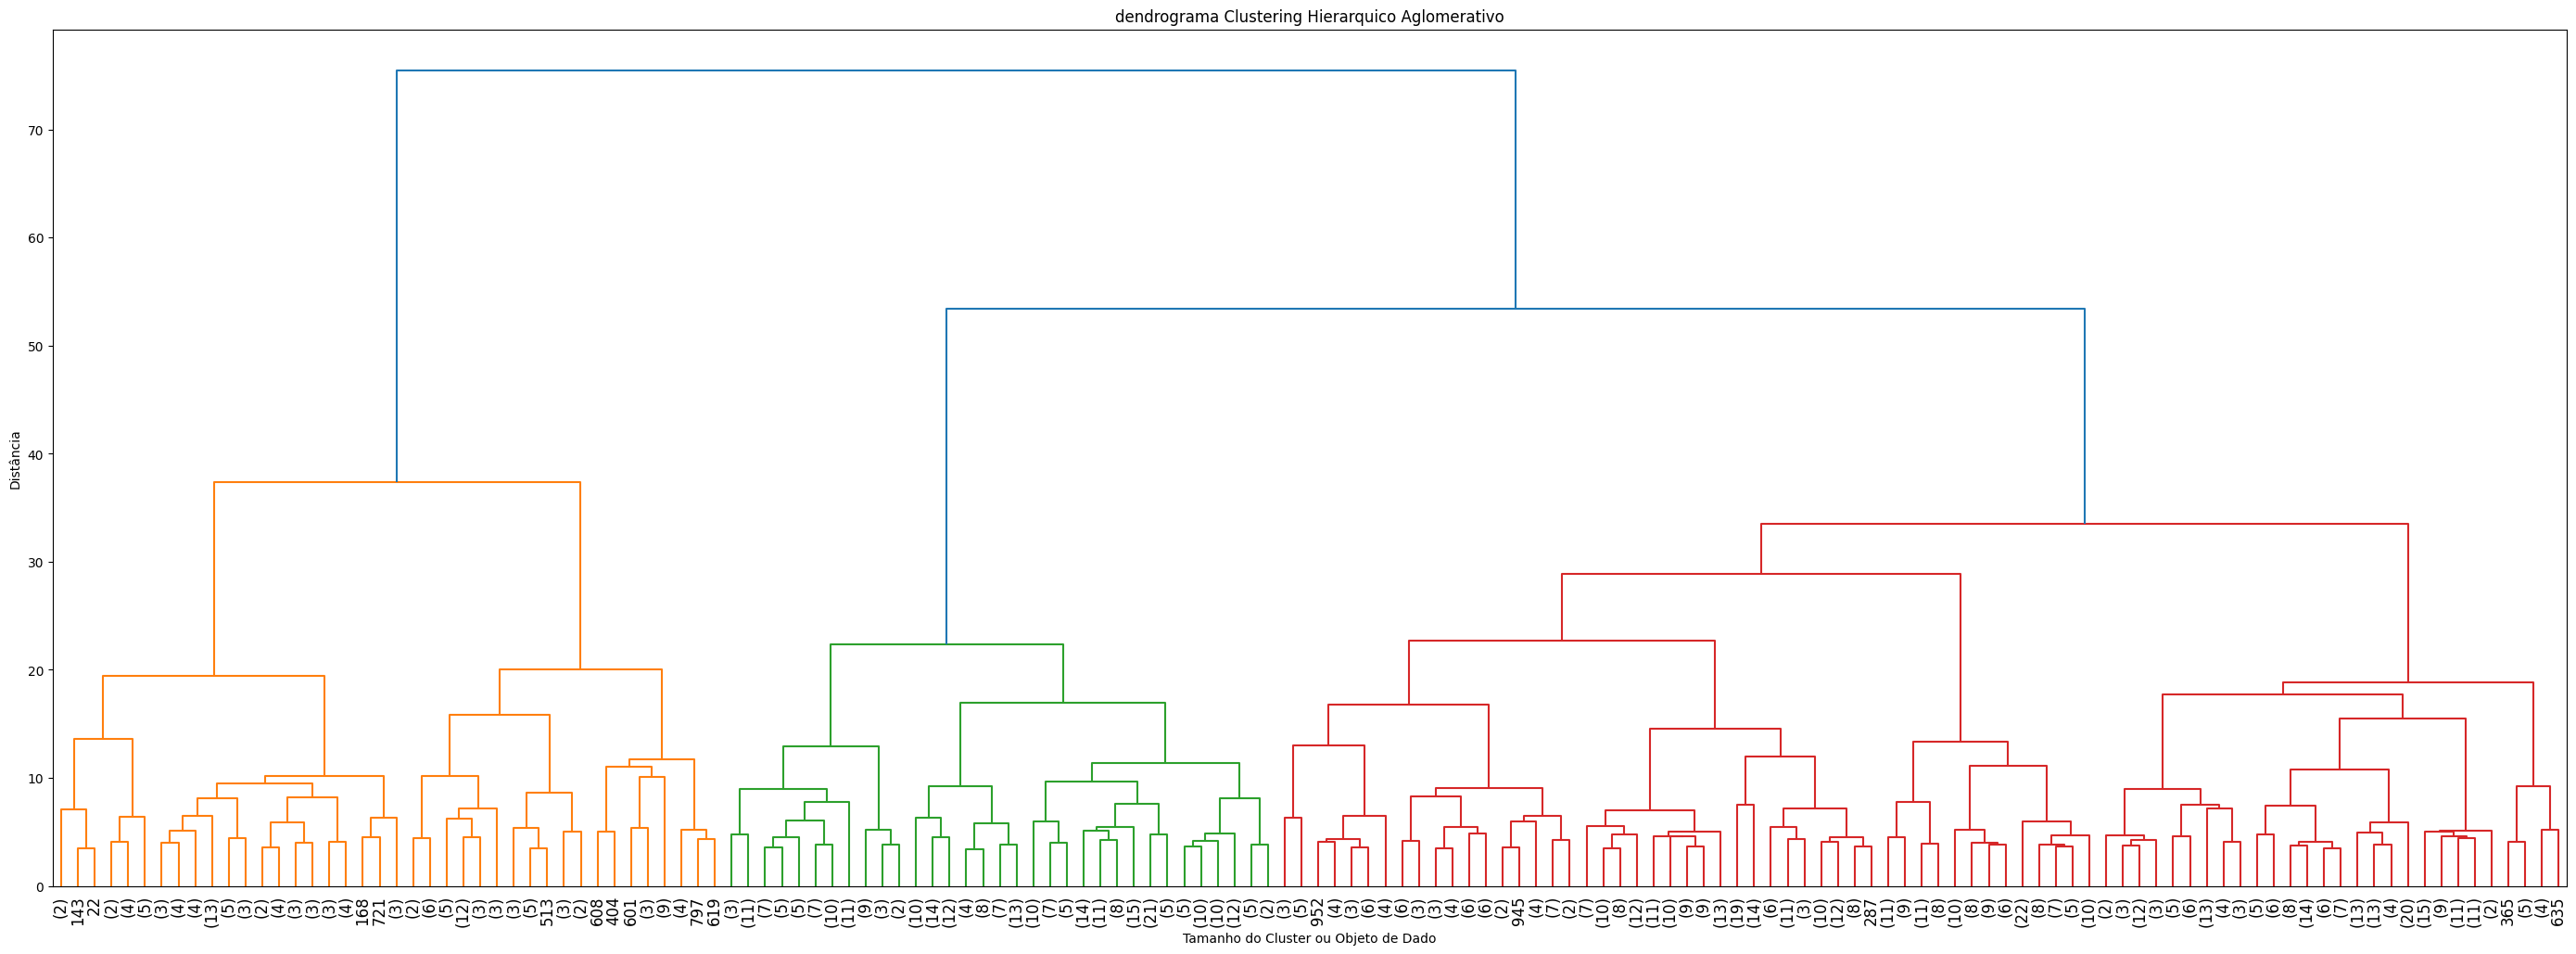

In [139]:
# Mostrar Dendrograma
plt.figure(figsize=(35, 12))
dendrogram(modelo_de, truncate_mode='lastp', p=150, leaf_rotation=90, leaf_font_size=12)
plt.title('dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dado')
plt.ylabel('Distância')
plt.show()

In [141]:
# Cortar o Dendrograma
cluster_de_scipy = cut_tree(modelo_de, height=32)
np.unique(cluster_de_scipy), len(np.unique(cluster_de_scipy))

(array([0, 1, 2, 3, 4]), 5)

In [ ]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [144]:
# Cruzamento entre cluster e price, apresentando as brands
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [145]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [146]:
# Distribuicao da variavel cluster
percentual_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [ ]:
# Distribuicao da variavel cluster
qtde_cluster = df_laptops.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

In [149]:
# Salvar Modelo e Processor
import joblib

# Salvar o modelo
joblib.dump(best_model, 'modelo_clusterizacao_laptops.pkl')

# Salvar o Pre Processor
joblib.dump(preprocessor, 'preprocessor_clustering_laptops.pkl')

['preprocessor_clustering_laptops.pkl']

In [150]:
# Salvar CSV atualizado com dados de cluster
df_laptops.to_csv('datasets/clusterizacao_laptops.csv', index=False)